In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.replace(" ","_").str.replace("/","_")

df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"] / 3

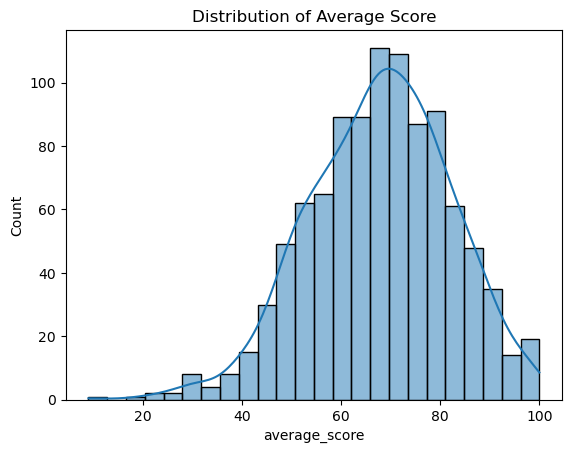

In [4]:
sns.histplot(df["average_score"], kde=True)
plt.title("Distribution of Average Score")
plt.show()


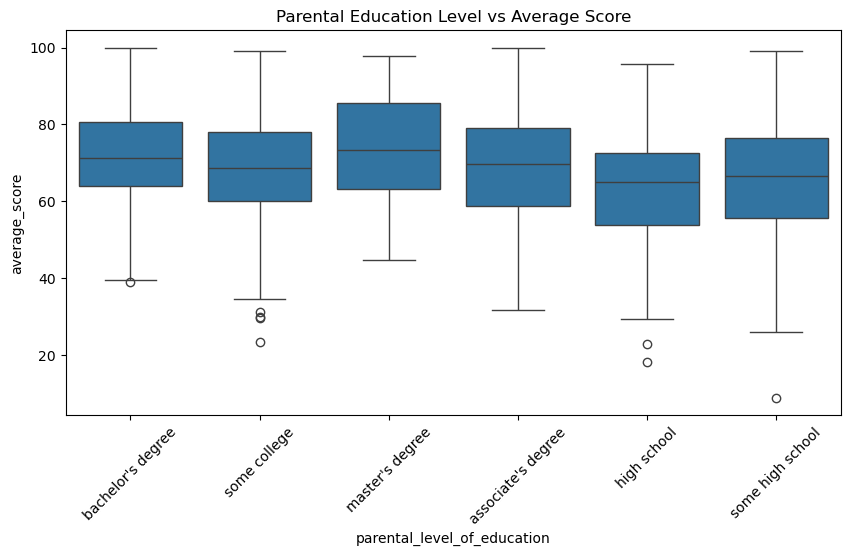

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x="parental_level_of_education",
    y="average_score",
    data=df
)
plt.xticks(rotation=45)
plt.title("Parental Education Level vs Average Score")
plt.show()


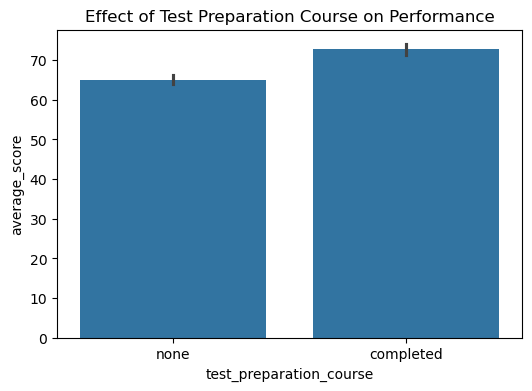

In [6]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="test_preparation_course",
    y="average_score",
    data=df,
    estimator="mean"
)
plt.title("Effect of Test Preparation Course on Performance")
plt.show()


In [7]:
def performance(score):
    if score>=75:
        return "High"
    elif score>=50:
        return "Medium"
    else:
        return "Low"
df["performance_level"] = df["average_score"].apply(performance)

In [8]:
df.to_csv("final_student_data.csv", index=False)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [10]:
# Select numerical features
X = df[["math_score", "reading_score", "writing_score"]]
y = df["average_score"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 8.890665981198253e-15
R2 Score: 1.0


In [14]:
sample_student = [[70, 75, 80]]  # math, reading, writing
predicted_score = model.predict(sample_student)

print("Predicted Average Score:", predicted_score[0])


Predicted Average Score: 75.0


C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
